### Import required packages

In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Get the data

In [2]:
data = pd.read_csv('cleaned_train.csv')

In [3]:
y = data.Survived.values

In [4]:
X = data.drop(columns=['Survived']).values

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Build models

#### 1. Logistic Regression

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [7]:
clf = LogisticRegression()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
# Accuracy
logistic_acc = accuracy_score(y_pred, y_test)
logistic_acc

0.8283582089552238

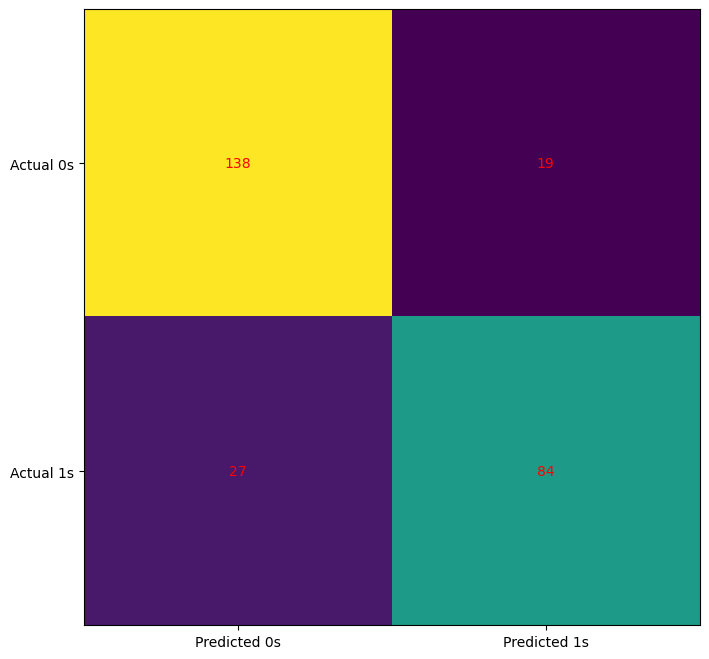

In [8]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [9]:
from sklearn.metrics import precision_score, recall_score
print(f'Precision:{precision_score(y_test, y_pred)}')
print(f'Recall:{recall_score(y_test, y_pred)}')

Precision:0.8155339805825242
Recall:0.7567567567567568


In [10]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(y_test, y_pred)
print(f'AUC:{auc(fpr, tpr)}')
auc_score = auc(fpr, tpr)
auc_score

AUC:0.817868824238251


0.817868824238251

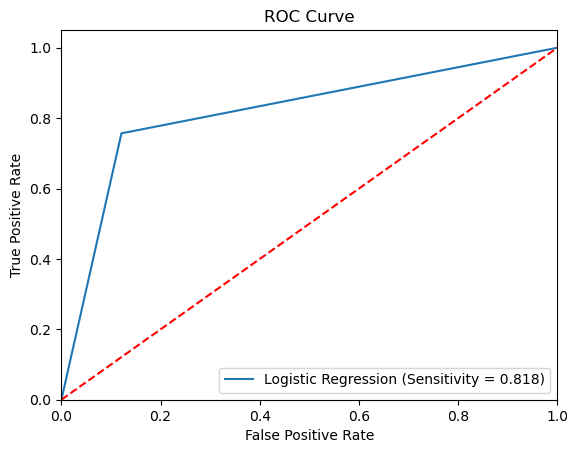

In [11]:
from matplotlib import pyplot as plt 
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (Sensitivity = %0.3f)'% auc_score )
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [12]:
print(f'Classification report:\n{classification_report(y_test, y_pred)}')

Classification report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       157
           1       0.82      0.76      0.79       111

    accuracy                           0.83       268
   macro avg       0.83      0.82      0.82       268
weighted avg       0.83      0.83      0.83       268



##### Tuning hyperparameters for logistic regression

In [13]:
clf1 = LogisticRegression(solver='saga',C=10,penalty='elasticnet', l1_ratio=.3, max_iter=2000)
clf1.fit(x_train, y_train)
y_pred1 = clf1.predict(x_test)
logistic_acc1 = accuracy_score(y_pred1, y_test)
logistic_acc1

0.8283582089552238

#### 2. SVM

In [41]:
from sklearn.svm import LinearSVC
linear_svc = LinearSVC(max_iter=50000, random_state=42, C=100)
linear_svc.fit(x_train, y_train)
lsvc_pred = linear_svc.predict(x_test)
acc_linear_svc = round(linear_svc.score(x_train, y_train) * 100, 2)
lsvc = accuracy_score(lsvc_pred, y_test)
lsvc

/home/goro/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8283582089552238

#### 3. KNN

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 18) 
knn.fit(x_train, y_train)  
knn_pred = knn.predict(x_test)  
acc_knn = round(knn.score(x_train, y_train) * 100, 2)
kn = accuracy_score(knn_pred, y_test)
kn

0.832089552238806

In [17]:
# Improve KNN
from sklearn.model_selection import GridSearchCV
knn_grid = GridSearchCV(estimator=KNeighborsClassifier(), param_grid={'n_neighbors':np.arange(1, 30)}, cv=5)
knn_grid.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [18]:
knn_grid.best_params_

{'n_neighbors': 18}

In [27]:
# from matplotlib.colors import ListedColormap
# X_set, y_set = x_test, y_test
# X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
#                      np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
# plt.contourf(X1, X2, knn.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
#              alpha = 0.75, cmap = ListedColormap(('red', 'green')))
# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())
# for i, j in enumerate(np.unique(y_set)):
#     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
#                 c = ListedColormap(('red', 'green'))(i), label = j)
# plt.title('KNN Classification')
# plt.xlabel('DMV_Test_1')
# plt.ylabel('DMV_Test_2')
# plt.legend()
# plt.show()

#### 4. Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=0) 
decision_tree.fit(x_train, y_train)  
dt_pred = decision_tree.predict(x_test)  
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
dt = accuracy_score(dt_pred, y_test)
dt

0.7798507462686567

##### Visualizing decision tree

In [20]:
from sklearn import tree
t = tree.export_text(decision_tree)
#print(t)

In [21]:
def mapper(x):
    if x == 0:
        return 'Not Survived'
    else:
        return 'Survived'
class_labels = list(map(mapper, y))

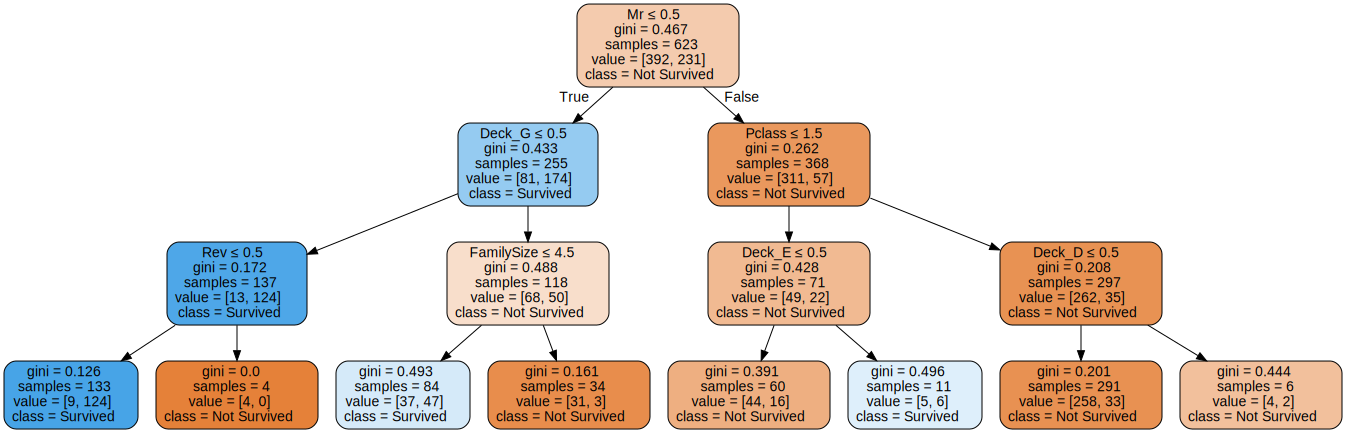

In [22]:
from sklearn import tree
import graphviz
iristree = tree.DecisionTreeClassifier(max_depth=3, criterion='gini', random_state=0)
iristree.fit(x_train, y_train)
feat = data.drop(columns=['Survived']).columns
dot_data = tree.export_graphviz(iristree, out_file=None, 
                      feature_names=feat,  
                      class_names=class_labels,
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)
display(graph)

#### 5. Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(x_train, y_train)
rn_pred = random_forest.predict(x_test)
random_forest.score(x_train, y_train)
acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)
rn = accuracy_score(rn_pred, y_test)
rn

0.7985074626865671

In [24]:
# Optimize random forest
rand_forest = RandomForestClassifier(n_estimators=150, bootstrap=True, oob_score=True, random_state=42)
rand_forest.fit(x_train, y_train)
rand_pred = rand_forest.predict(x_test)
rand_acc = accuracy_score(rand_pred, y_test)
acc_rand_forest = round(rand_forest.score(x_train, y_train) * 100, 2)
print(f'Testing accuracy:{rand_acc:.2%}')
print(f'Training accuarcy:{rand_forest.score(x_train, y_train):.2%}')

Testing accuracy:79.85%
Training accuarcy:88.60%


In [28]:
# Getting best model
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 
              'Decision Tree'],
    'Accuracy': [lsvc, kn, logistic_acc, rn,  dt]})
result_df = results.sort_values(by='Accuracy', ascending=False)
result_df = result_df.set_index('Accuracy')
result_df.head(9)

,Model
Accuracy,
0.832090,KNN
0.828358,Support Vector Machines
0.828358,Logistic Regression
0.798507,Random Forest
0.779851,Decision Tree
